### Data Import


## Executive Summary

This project analyzes sales, revenue, customer ratings, and shipping costs
across four stores to identify the most profitable and sustainable business option.

Key outcomes:
- Store X shows the highest revenue performance.
- Store Y offers cost-efficiency advantages.
- Actionable recommendations are provided for strategic decision-making.

## Business Problem

A company needs to decide which store to prioritize based on:
- Revenue performance
- Customer satisfaction
- Shipping cost efficiency

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Data Sources

STORE_URLS = {
"Store 1" : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
"Store 2" : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
"Store 3" : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
"Store 4" : "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv",

}

# Load Data

def load_store_data(urls):
    dfs = []
    for store, url in urls.items():
        df = pd.read_csv(url)
        df["Store"] = store
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

sales_df = load_store_data(STORE_URLS)

In [40]:
def bar_plot(df, x, y, title, xlabel, ylabel, value_format='{:.0f}', figsize=(8,5)):
    plt.figure(figsize=figsize)
    bars = plt.bar(df[x], df[y])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            value_format.format(height),
            ha='center',
            va='bottom'
        )

    plt.show()

#1. Billing analysis



In [41]:
# Data Sources
STORE_URLS = {
    "Store 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Store 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Store 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Store 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv",
}

def load_store_data(urls):
    dfs = []
    for store, url in urls.items():
        df = pd.read_csv(url)
        df["Store"] = store
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

sales_df = load_store_data(STORE_URLS)


In [42]:
sales_df["Store"].value_counts()

,count
Store,
Store 1,2359
Store 2,2359
Store 3,2359
Store 4,2358


In [43]:
revenue_by_store = (
    sales_df.groupby("Store")["Precio"].sum().reset_index()
    .rename(columns={"Precio": "Total Revenue"})
    .sort_values("Total Revenue", ascending=False)
)

revenue_by_store.style.format({
    "Total Revenue": "{:,.0f}"
})

,Store,Total Revenue
0,Store 1,"1,150,880,400"
1,Store 2,"1,116,343,500"
2,Store 3,"1,098,019,600"
3,Store 4,"1,038,375,700"


In [44]:
### Revenue by Store – Sample Output (Pandas)

revenue_by_store.head().to_markdown(index=False)

'| Store   |   Total Revenue |\n|:--------|----------------:|\n| Store 1 |     1.15088e+09 |\n| Store 2 |     1.11634e+09 |\n| Store 3 |     1.09802e+09 |\n| Store 4 |     1.03838e+09 |'

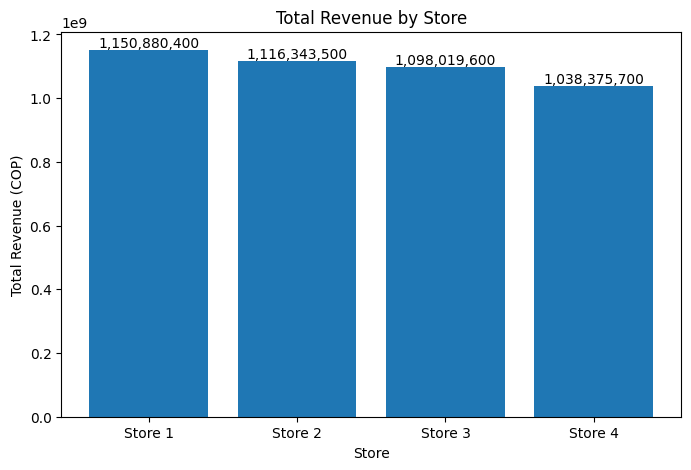

In [45]:
# Grafica

bar_plot(
    df=revenue_by_store,
    x="Store",
    y="Total Revenue",
    title="Total Revenue by Store",
    xlabel="Store",
    ylabel="Total Revenue (COP)",
    value_format="{:,.0f}",
    figsize=(8,5)
)

In [46]:
sales_by_category = (
    sales_df
        .groupby(['Store', 'Categoría del Producto'])
        .size()
        .reset_index(name='Number of Sales')
)

sales_by_category.head()

,Store,Categoría del Producto,Number of Sales
0,Store 1,Artículos para el hogar,171
1,Store 1,Deportes y diversión,284
2,Store 1,Electrodomésticos,312
3,Store 1,Electrónicos,448
4,Store 1,Instrumentos musicales,182


In [47]:
sales_by_category.head(10).to_markdown(index=False)

'| Store   | Categoría del Producto   |   Number of Sales |\n|:--------|:-------------------------|------------------:|\n| Store 1 | Artículos para el hogar  |               171 |\n| Store 1 | Deportes y diversión     |               284 |\n| Store 1 | Electrodomésticos        |               312 |\n| Store 1 | Electrónicos             |               448 |\n| Store 1 | Instrumentos musicales   |               182 |\n| Store 1 | Juguetes                 |               324 |\n| Store 1 | Libros                   |               173 |\n| Store 1 | Muebles                  |               465 |\n| Store 2 | Artículos para el hogar  |               181 |\n| Store 2 | Deportes y diversión     |               275 |'

# 2. Sales By product Category

In [48]:
sales_by_category = (
    sales_df
        .groupby(['Store', 'Categoría del Producto'])
        .size()
        .reset_index(name='Number of Sales')
)

sales_by_category.head()

,Store,Categoría del Producto,Number of Sales
0,Store 1,Artículos para el hogar,171
1,Store 1,Deportes y diversión,284
2,Store 1,Electrodomésticos,312
3,Store 1,Electrónicos,448
4,Store 1,Instrumentos musicales,182


In [49]:
sales_by_category.sort_values(
    ['Store', 'Number of Sales'],
    ascending=[True, False]
).head(10)

,Store,Categoría del Producto,Number of Sales
7,Store 1,Muebles,465
3,Store 1,Electrónicos,448
5,Store 1,Juguetes,324
2,Store 1,Electrodomésticos,312
1,Store 1,Deportes y diversión,284
4,Store 1,Instrumentos musicales,182
6,Store 1,Libros,173
0,Store 1,Artículos para el hogar,171
15,Store 2,Muebles,442
11,Store 2,Electrónicos,422


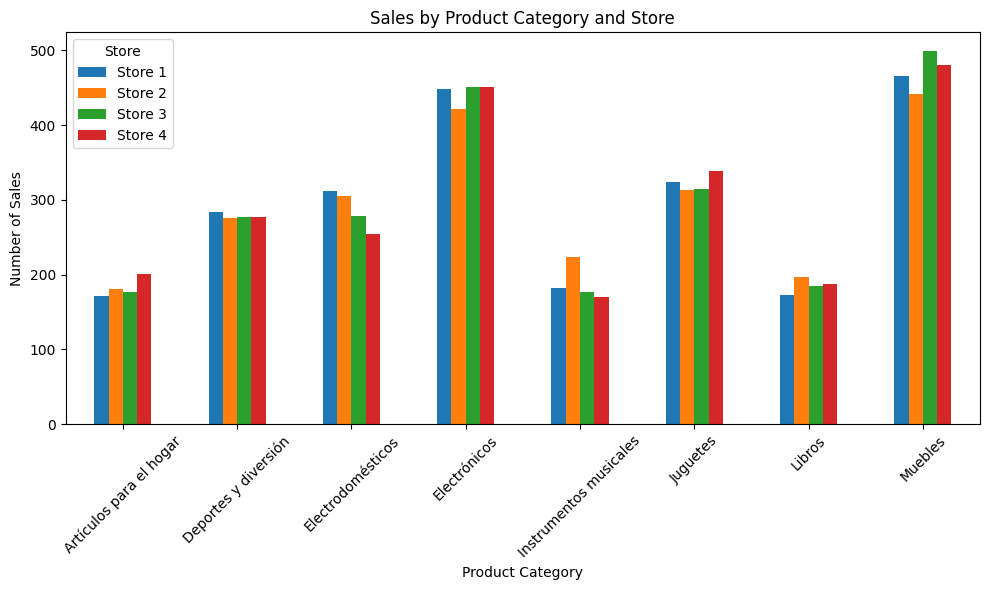

In [50]:
import matplotlib.pyplot as plt

sales_pivot = sales_by_category.pivot(
    index='Categoría del Producto',
    columns='Store',
    values='Number of Sales'
)

sales_pivot.plot(kind='bar', figsize=(10,6))

plt.title('Sales by Product Category and Store')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Average Store Rating


In [51]:
calificacion_tienda = (
    sales_df.groupby('Store')['Calificación']
    .mean()
    .reset_index()
    .rename(columns={'Calificación': 'Calificación Promedio'})
)

calificacion_tienda

,Store,Calificación Promedio
0,Store 1,3.976685
1,Store 2,4.037304
2,Store 3,4.048326
3,Store 4,3.995759


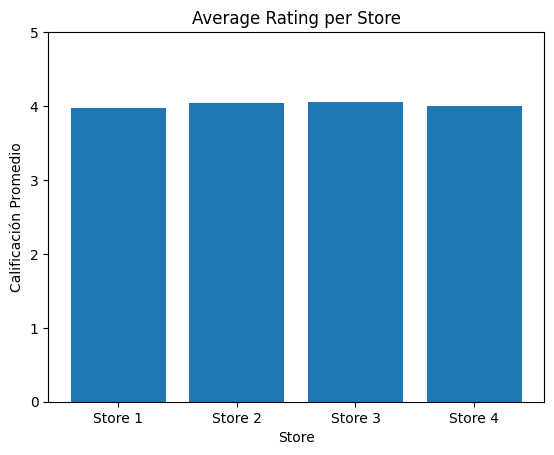

In [52]:
# Grafico

import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    calificacion_tienda['Store'],
    calificacion_tienda['Calificación Promedio']
)
plt.title('Average Rating per Store')
plt.xlabel('Store')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)
plt.show()

# 4. Most and least sold products

In [53]:
# Ventas por producto y tienda

sales_by_product = (
    sales_df
        .groupby(['Store', 'Producto'])
        .size()
        .reset_index(name='Number of Sales')
)

sales_by_product.head()

,Store,Producto,Number of Sales
0,Store 1,Ajedrez de madera,49
1,Store 1,Armario,60
2,Store 1,Asistente virtual,40
3,Store 1,Auriculares,50
4,Store 1,Auriculares con micrófono,33


In [54]:
# Producto MÁS vendido por tienda

top_product_by_store = (
    sales_by_product
        .sort_values(['Store', 'Number of Sales'], ascending=[True, False])
        .groupby('Store')
        .head(1)
)

top_product_by_store

,Store,Producto,Number of Sales
1,Store 1,Armario,60
75,Store 2,Iniciando en programación,65
129,Store 3,Kit de bancas,57
163,Store 4,Cama box,62


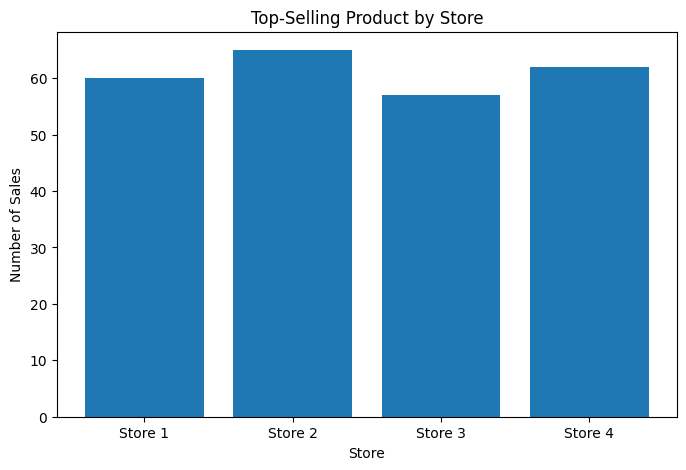

<Figure size 640x480 with 0 Axes>

In [55]:
# Grafico

plt.figure(figsize=(8,5))
plt.bar(
    top_product_by_store['Store'],
    top_product_by_store['Number of Sales']
)
plt.title('Top-Selling Product by Store')
plt.xlabel('Store')
plt.ylabel('Number of Sales')
plt.show()
plt.tight_layout()
plt.show()


\# 5. Average shipping per store
---



In [56]:
average_shipping_cost_by_store = (sales_df.groupby('Store')['Costo de envío'].mean().reset_index(name='Average Shipping Cost'))
average_shipping_cost_by_store


,Store,Average Shipping Cost
0,Store 1,26018.609580
1,Store 2,25216.235693
2,Store 3,24805.680373
3,Store 4,23459.457167


# Final Analysis

## Revenue

The total revenue analysis shows that **Store 1** generated the highest revenue, with a total of **1,150,880,000**, while **Store 4** recorded the lowest revenue at **1,038,376,000**. Additionally, **Store 2** ranked as the second-highest revenue generator, reaching **1,116,344,000**.

These results clearly position **Store 1** as the primary revenue driver within the analyzed dataset, highlighting its strong commercial performance compared to the other stores.

---

## Sales by Category

The analysis of sales by product category reveals noticeable differences in the distribution of products sold across stores. Each store exhibits a leading sales category, reflecting differentiated customer preferences and purchasing behavior.

The top-selling categories by store are as follows:

- **Store 1:** Sports and Leisure (284 sales)  
- **Store 2:** Home Appliances (312 sales)  
- **Store 3:** Electronics (448 sales)  
- **Store 4:** Musical Instruments (182 sales)  

These results indicate higher demand in the listed categories and reflect varying levels of specialization, diversification, and commercial performance among the stores. This information is key for assessing each store’s efficiency and overall contribution to the business.

---

## Average Store Rating

Regarding average customer ratings, all stores present scores close to **4 out of 5**, indicating a generally high level of customer satisfaction. **Store 3** stands out with the highest average rating of **4.05**, suggesting a more consistent and positively perceived shopping experience. **Store 2** follows closely with an average rating of **4.04**, also maintaining a strong satisfaction level.

**Store 4** records an average rating of **4.00**, which reflects positive customer perception, although with some room for improvement compared to the leading stores. Finally, **Store 1** has the lowest average rating at **3.98**; however, this value remains near the high-satisfaction threshold, indicating that customers are largely satisfied, with potential opportunities for targeted improvements.

Overall, rating differences among stores are relatively small, suggesting a fairly homogeneous customer experience. Nevertheless, **Store 3** and **Store 2** slightly outperform the others and could serve as benchmarks for best practices.

---

## Best- and Worst-Selling Products

From the product-level analysis, **wardrobes** emerged as the best-selling product, with **60 units sold in Store 1**, indicating strong market acceptance and high product turnover. In contrast, **board games** were identified as the least-selling product, with **32 units sold in Store 2**, suggesting lower demand.

This finding highlights potential opportunities for improvement through pricing adjustments, promotional strategies, or product repositioning within the catalog.

---

## Average Shipping Cost by Store

Finally, the analysis of average shipping costs shows that **Store 1** has the highest average shipping cost at **26,018.61**, which may be associated with factors such as longer delivery distances, higher order volumes, or specific logistics agreements. These costs could potentially influence customer purchasing decisions.

On the other hand, **Store 4** reports the lowest average shipping cost at **23,459.46**, indicating greater logistical efficiency and more favorable shipping conditions. This represents a competitive advantage compared to the other stores.

# Strategic Recommendation

## Priority Store: Store 3

It is recommended to prioritize **Store 3**, as it demonstrates the strongest overall performance among the analyzed stores. This store stands out for several key reasons:

- It has one of the **highest revenue levels**, very close to the top-performing store.
- It records the **highest average customer rating (4.05)**, reflecting an excellent customer experience.
- It leads category sales in **Electronics (448 sales)**, indicating strong demand and efficient product turnover.
- It maintains a **solid balance between sales volume, customer satisfaction, and commercial performance**.

Although its shipping costs are not the lowest, the combination of high sales and strong customer satisfaction suggests that customers perceive a **high value proposition**, which compensates for the shipping cost. For these reasons, **Store 3 represents the most robust and sustainable option in the long term**.

---

## Alternative Consideration: Store 4

It is also worth considering **Store 4**, particularly from a **cost-optimization perspective**, as it presents the following advantages:

- It has the **lowest average shipping cost**, which constitutes a clear competitive advantage.
- It maintains a **positive average rating (4.00)**, close to the overall mean.
- It may be especially attractive to **price-sensitive customers**, particularly those influenced by shipping costs.

However, its **lower revenue levels** suggest that there is still room to strengthen its commercial performance and market positioning.
